# Analiza Animejev

V tem besedilu bomo analizirali statistiko animejev. Podatki so bili zajeti s strani [MyAnimeList](https://myanimelist.net/) in obdelani s skripto napisano v pythonu. Nekaj več o obdelavi si lahko preberete na mojem [githubu](https://github.com/DanielVitas/projektna-naloga-programiranje-1).

## Uvod

**Anime** je ime za Japonsko filmsko in televizijsko animacijo. Danes kot anime označimo bistveno več, namreč današnjemu animeju ni treba biti več niti iz Japonske (imamo že nekaj Ameriških animejev) niti ni potrebno, da je v povezavi s televizijo (kar nekaj je namreč animejev dostopnih zgolj na internetu t.i. ONA).

Spekter animejev je torej precej širok, zato jih je pametno ločevati na kategorije:
* TV: anime predvajan po Japonski televiziji
* Movie: daljši (približno uro in pol) anime, ki je načeloma celota (ni v več delih)
* ONA: anime, objavljen najprej po internetu (preden je predvajan drugje - ponavadi nikoli ni)
* OVA: anime, izdan najprej v fizični obliki (kasete, cd,...)
* Music: načeloma kratka animacija k neki glasbi
* Special: dodatek k nekemu drugemu animeju

Seveda je še kar nekaj pomembnih stvari o tem kako so animeji izdelani in predvajani, a bom namenoma zaenkrat o tem molčal ter se bom k tem vrnil spotoma. Sedaj pa kar začnimo analizirati!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

warnings.filterwarnings('ignore')  # zaradi preglednosti na mestih kjer bi bilo izpisano opozorilo stoji komentar

anime = pd.read_csv('data/anime.csv', index_col='id')
pd.options.display.max_rows = 10

In [2]:
anime

,title,score,airedfrom,airedto,episodes,type,status,source,rating,members,duration,rank,popularity,favorites,description
id,,,,,,,,,,,,,,,
1,Cowboy Bebop,8.81,1998-04-03 00:00:00,1999-04-24 00:00:00,26.0,TV,Finished Airing,Original,R - 17+ (violence &amp; profanity),758864,24 min. per ep.,27,38,41714,"In the year 2071, humanity has colonized sever..."
5,Cowboy Bebop: Tengoku no Tobira,8.41,2001-09-01 00:00:00,NaN,1.0,Movie,Finished Airing,Original,R - 17+ (violence &amp; profanity),190962,1 hr. 55 min.,158,445,753,"Another day, another bounty—such is the life o..."
6,Trigun,8.30,1998-04-01 00:00:00,1998-09-30 00:00:00,26.0,TV,Finished Airing,Manga,PG-13 - Teens 13 or older,395512,24 min. per ep.,248,143,10187,"Vash the Stampede is the man with a $$60,000,0..."
7,Witch Hunter Robin,7.33,2002-07-02 00:00:00,2002-12-24 00:00:00,26.0,TV,Finished Airing,Original,PG-13 - Teens 13 or older,77661,25 min. per ep.,2346,1142,531,Witches are individuals with special powers li...
8,Bouken Ou Beet,7.03,2004-09-30 00:00:00,2005-09-29 00:00:00,52.0,TV,Finished Airing,Manga,PG - Children,11546,23 min. per ep.,3500,3640,14,It is the dark century and the people are suff...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38435,Yao Shen Ji 3rd Season,7.44,2018-10-01 00:00:00,NaN,40.0,ONA,Currently Airing,Novel,PG-13 - Teens 13 or older,384,7 min. per ep.,2109,10448,4,The third Season of Yao Shen Ji.
38446,Larva Island,4.50,2018-10-19 00:00:00,NaN,13.0,ONA,Finished Airing,Original,G - All Ages,23,8 min. per ep.,11454,14766,0,The 4th season of Larva. Stranded on a tropica...
38451,Reizouko no Tsukenosuke!,5.50,2018-10-01 00:00:00,NaN,NaN,TV,Currently Airing,Original,G - All Ages,20,1 min.,12252,14777,0,A gag anime about foods in a refrigerator. The...


Zgoraj so lepo vidni zajeti podatki. Kaj so, je zelo na grobo opisano v README. Kar bi nas lahko skrbelo je, da je *duration* raje kot s številko predstavljen z besedo (npr. "24 min. per ep."). To se zdi neugodno za obdelovanje, a pravzaprav obstajajo standardi za tipe animejev, ki se jih v ogromni večini držijo (npr. TV - 24min, Movie - 1h 30min), zato obdelovanje po dolžini epizode niti ni smiselno. Prav tako se zdi kot, da nimamo kaj delati z *describtion*-om. To je res.

## Osnovne povezave med podatki

Uporabniki na MyAnimeList (**MAL**) lahko ocenjujejo animeje, ter označijo, da so jih pogledali. Na tak način dobimo *score* in *members* respektivno. A kaj je *rank*? Pa poglejmo kaj ima MAL povedati o tem:

__Weighted Rank (WR) = (v / (v + m)) * S + (m / (v + m)) * C__
* S = Average score for the Anime (mean).
* v = Number of votes for the Anime = (Number of people scoring the Anime).
* m = Minimum votes/scores required to get a calculated score (currently 50 scores required).
* C = The mean score across the entire Anime DB.

Pri dovolj popularnih animejih (tj. **1 << v**) je **m << v** in zato je **WR ~ S**, kot potrdi naslednji graf:

In [3]:
popular_anime = anime[anime['members'] > 10000]
popular_anime.shape[0]  # preverimo, da je 'popularnih' animejev dovolj

3686

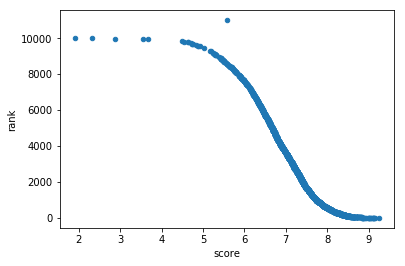

In [4]:
popular_anime.plot.scatter(x='score', y='rank')

Graf v resnici prikazuje *rank*, ne *WR*. Rank je namreč uvrstitev animejev glede na izračunan WR, tako je sedaj tudi lažje razumeti, da graf ne pada linearno - to je posledica neenakomerne porazdelitve ocen (večina se giba okrog povprečne).

Prej sem omenil, da je popularnost merjena z *members*. Porodi se seveda vprašanje: kaj je potem *popularity*? Na spletni strani sicer tega podatka nisem našel, a se zdi skoraj očitno, da je to uvrstitev animejev glede na *members*. In res:

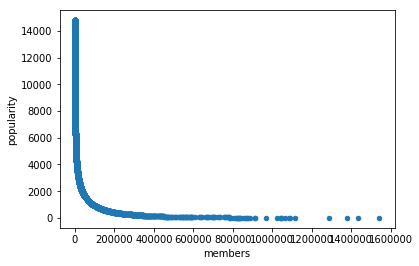

In [5]:
anime.plot.scatter(x='members', y='popularity')

Ker imamo torej več podatkov, ki povejo isto stvar je nekaj stolpcev nepotrebnih. Obdržali bomo *score* in *members*.

In [6]:
anime = anime.drop(['rank', 'popularity'], axis=1)

Ko smo že pri odstranjevanju, bi se lahko uprašali kako točno se *favorites* razlikuje od *score*. Na MAL obstaja možnost označiti anime kot "favorite", da poudariš, da ti je bil posebno všeč. Zdi se kot, da mora favorites naraščati z oceno.

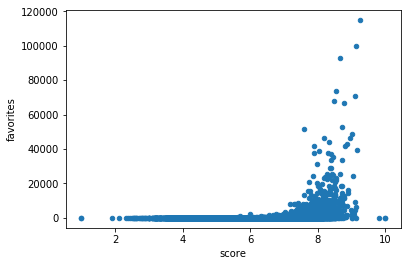

In [7]:
anime.plot.scatter(x='score', y='favorites')

A kot vidite *favorites* ni čisto isto kot *score* in v nadaljevanju bomo gledali kako je povezan z drugimi podatki. Kdor ni pogledal animeja, ga seveda ne more označiti kot favorite, zato se zdi smiselno, da večji kot je *members* več je *favorites*.

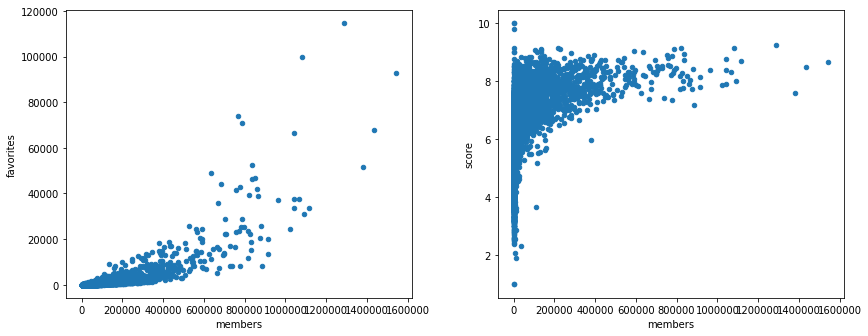

In [8]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 0.8, 1])
ax2 = fig.add_subplot(121, position=[1, 0, 0.8, 1])
anime.plot(x='members', y='favorites', kind='scatter', ax= ax1)
anime.plot(x='members', y='score', kind='scatter', ax= ax2)

Graf se seveda malo pokvari pri zelo popularnih animejih, saj je takih bolj malo. Graf *score* od *members* je kljub temu dovolj nazoren in je očitno, da bolj kot je anime popularen boljšo oceno ima. To ovrže mojo prvo hipotezo: **"Z popularnostjo se povprečna ocena viša, do neke meje, od kjer naprej začne padati,"** ali vsaj drugi del le te. Morda bi res bilo pravzaprav čudno če bi ocena animejev z kakršno koli popularnostjo padala.

Poglejmo si sedaj polj podrobno obliko teh istih grafov, le da jih gledamo zgolj za manj popularne animeje. Zavoljo lepših grafov bomo razdelili animeje na razrede glede na popularnost.

In [9]:
unpopular_anime = anime[anime['members'] < 5000]
unpopular_anime.loc[:, 'avarage_members'] = round(unpopular_anime['members'] / 500) * 500  # OPOZORILO PANDAS
unpopular_anime.shape[0]

8413

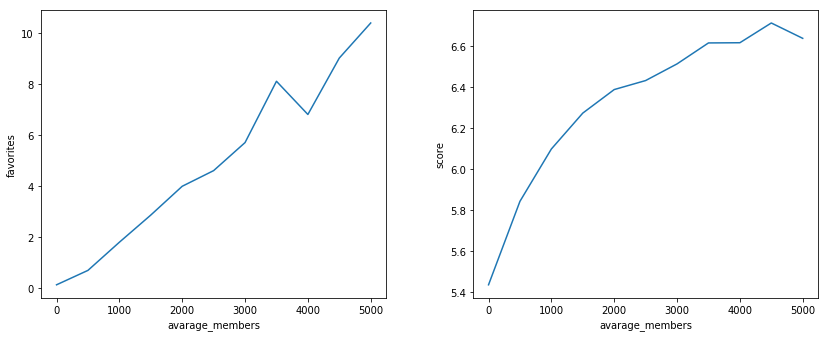

In [10]:
anime_by_members = unpopular_anime.groupby('avarage_members')
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 0.8, 1])
ax1.set_ylabel('favorites')
ax2 = fig.add_subplot(121, position=[1, 0, 0.8, 1])
ax2.set_ylabel('score')
anime_by_members['favorites'].mean().plot(ax=ax1)
anime_by_members['score'].mean().plot(ax=ax2)

Iz grafov razberemo naraščanje. Še natančneje, opazimo namreč, da *favorites* raste linearno z *popularity*, *score* pa korensko.

Ko že primerjamo *favorites* in *score*, pa si poglejmo še kako sta povezana s kategorijami, ki so bile opisane na začetku. Pa kar povejmo hipotezo: **"Animeji predvajani na televiziji so bolj popularni od tistih z drugih virov."** Večina animejev je v resnici predvajana po televiziji, zato ne bo presenetljivo, da so tudi bolj popularni (saj so načeloma bistveno daljši od drugih tipov, zato se ljudje na njih najlažje navežejo).

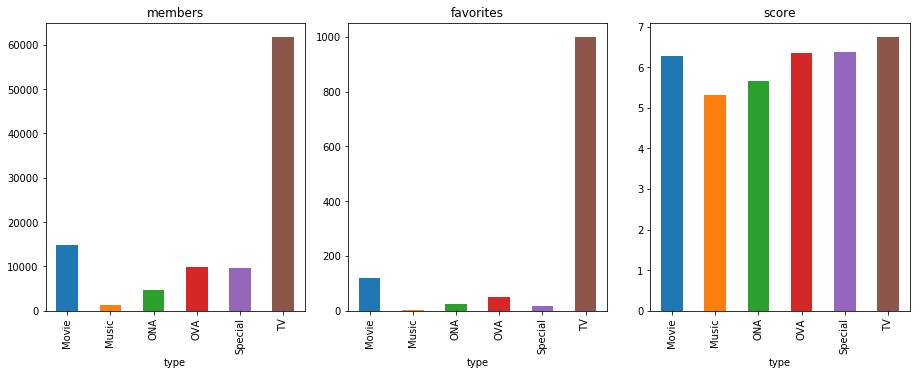

In [11]:
anime_by_type = anime.groupby('type')
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 0.6, 1])
ax2 = fig.add_subplot(121, position=[0.7, 0, 0.6, 1])
ax3 = fig.add_subplot(211, position=[1.4, 0, 0.6, 1])
anime_by_type['members'].mean().plot.bar(title='members', ax=ax1)
anime_by_type['favorites'].mean().plot.bar(title='favorites', ax=ax2)
anime_by_type['score'].mean().plot.bar(title='score', ax=ax3)

Hipoteza je očitno pravilna. Izkaže se, da pri na drugem grafu prav tako (mogoče še bolj) iztopa TV, kar se zdi logično, saj *favorites* narašča približno linearno s popularnostjo (pravzaprav to linearnost prav zgorenj graf dodatno potrdi). Kar pa nas morda na videz preseneti, je to, da je *score* praktično enak za vse tipe, kljub temu, da tudi ta narašča s popularnostjo. A prav tu se pokaže glavna razlika med *favorites* in *score*, namreč *favorites* je navzgor omejen z *members*, medtem je score lahko poljuben, ne glede na *members*. V povprečju res narašča, a očitno se stvar pokvari ko medseboj primerjamo različne kategorije. A tu lahko potegnemo zaključek, da čeprav se popularnost kategorij močno razlikuje je povprečna ocena približno enaka za vse kategorije. Mimogrede smo pokazali: **"Povprečna ocena vseh filmov je nižja kot tista vseh animejev (predvajanih po televiziji),"** a razlika ocen je bila dosti manjša od pričakovane.

Preden gremo naprej se mi zdi, da smo nabrali dovolj potrdil, da nam *favorites* ne pove kaj več od *members*, zato se ga bomo znebili.

In [12]:
anime = anime.drop('favorites', axis=1)

Kot sem že prej omenil, pri zagovoru svoje hipoteze, so animeji predvajani po televiziji daljši od drugih. Pa preverimo, še kako sta *popularity* ter *score* povezana z dolžino. Naša hipoteza tu pa je: **"Povprečna ocena se z dolžino animeja manjša, a popularnost veča, prav tako kot število favoritov."** Če se *members* veča bo to po prejšnjih opazkah za nas dovolj, da sklepamo, da se veča tudi *favorites*.

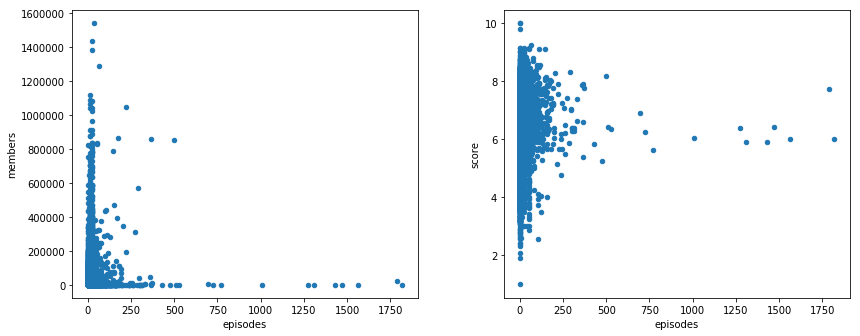

In [13]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 0.8, 1])
ax2 = fig.add_subplot(121, position=[1, 0, 0.8, 1])
anime.plot(x='episodes', y='members', kind='scatter', ax= ax1)
anime.plot(x='episodes', y='score', kind='scatter', ax= ax2)

In [14]:
anime.score.mean()

6.338352268394967

Izgleda kot da popularnost zelo hitro pada z dolžino, ocena pa se pri dolgih animejih ustali približno pri povprečni (zgoraj izračunana). A ker so res dolgi animeji mogoče malo preredki, se način spremembe *members* in *score* z *epizodes* ne vidi tako dobro, zato se omejimo le na malo krajše animeje.

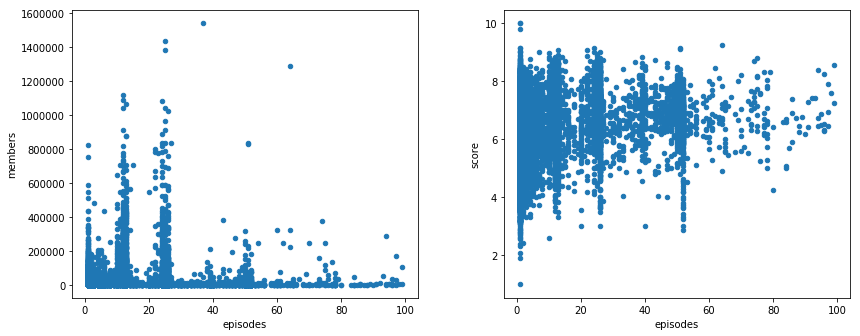

In [15]:
short_anime = anime[anime['episodes'] < 100]
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 0.8, 1])
ax2 = fig.add_subplot(121, position=[1, 0, 0.8, 1])
short_anime.plot(x='episodes', y='members', kind='scatter', ax= ax1)
short_anime.plot(x='episodes', y='score', kind='scatter', ax= ax2)

Sedaj naš graf izgleda kar se da čudno. Zmotijo nas namreč zgostitve, ki zajamejo precejšenj spekter prav tako *members* kot *favorites*. Da bi to pojasnili moramo vedeti malo več o animejih.

V splošnem so animeji predvajani po t.i. sezonah, to so tromesečja v letu (in so skoraj skladna z letnimi časi). Koliko epizod ima anime ni popolnoma naključno. Načeloma se animeji začnejo predvajati na začetku sezone, vsak teden nato izide nova epizoda in končajo se nakoncu sezone. Tako število epizod animeja nanese 12 - 13 (naša druga zgostitev). Dostikrat anime traja tudi dve sezoni in je tako dolg 24 - 25 epizod (tretja zgostitev). Za animeje daljše od dveh sezon pogosto ni nobenega pravila kdaj se končajo (je pa sicer še nekaj tistih ki trajajo celo leto - 50 epizod). Opazimo, da je naša prva zgostitev (sicer manjša od drugih dveh) pri 1 epizodi. To je zaradi specialnih epizod (ponavadi spadajo k nekemu daljšemu animeju), ki se štejejo za svoj anime, ter fimov, glasbenih animacij, ...

Naslednja stvar, ki jo verjetno opazimo, je zgostitev na dnu prvega grafa. Razlog za to je, da je večina animejev nepopularnih. Ogromno je takih za katere dosti ljudi sploh ne ve, da obstajajo, vendar čeprav nimajo konkretne baze gledalcev nizek proračun sploh ni problem pri proizvajanju animejev, saj je to mogoče tudi s še tako malo denarja (seveda pa trpi tu kvaliteta). Pravzaprav je v splošnem denar potreben za izdelavo animeja neprimerljiv s tistim, ki ga porabijo pri snemanju Holiwoodskih filmov, namreč dan danes 13 - epizoden anime (t.j. več kot 4 ure vsebine) od večjega studija v povprečju stane 2 miljona dolarjev. Ameriški film od večjega studija pa kar 100 miljonov dolarjev!

Ko sedaj mogoče malo bolj razumemo grafa (in animeje nasploh) se vrnimo k naši hipotezi. Žal se zdi, da je že prvi del neresničen, saj ni vidna posebna sprememba v oceni (razen mogoče majhne izboljšave čisto na začetku). A tudi drug del trditve ni resničen, saj, kot vidimo, se popularnost s številom epizod kvečjemu manjša. Da vsaj malo zagovorim svojo popolnoma neuspešno hipotezo - postavil sem je na nekaj primerih meni znanih animejev, ki so popularni, dolgi in imajo malo slabšo oceno (pravzaprav ne slabo, a le slabšo kot bi za svojo popularnost morali imeti). Tu je tudi to, da animeji, ki še zmeraj izhajajo, nimajo določenega števila epizod in se tako, čeprav je že poštevno število epizod izšlo, ne štejejo k našemu grafu.

## Anime skozi čas

Pa še malo zgodovine: prva Japonske animacija [Katsudou Shashin](https://myanimelist.net/anime/33187/Katsudou_Shashin?q=katsudo%20sas) dolga 3s je bila narejena leta 1907. Prvi anime, ki se je tedensko predvajal po televiziji katerega epizode so bile več kot 20min, torej anime v današnjem pomenu besede, je bil [Astro Boy (Tetsuwan Atom)](https://myanimelist.net/anime/2747/Tetsuwan_Atom?q=astro%20boy).

In [16]:
anime[(anime.title == 'Tetsuwan Atom') | (anime.title == 'Katsudou Shashin')]

,title,score,airedfrom,airedto,episodes,type,status,source,rating,members,duration,description
id,,,,,,,,,,,,
2747,Tetsuwan Atom,7.24,1963-01-01 00:00:00,1966-12-31 00:00:00,193.0,TV,Finished Airing,Manga,PG - Children,7000,26 min. per ep.,"In the year 2003, Professor Tenma is distraugh..."
33187,Katsudou Shashin,5.48,NaN,NaN,1.0,Movie,Finished Airing,Original,G - All Ages,2242,3 sec.,The film consists of a series of cartoon image...


Kot vidite sta oba zelo nepopularna, Katsudou Shashin pa je tudi podpovprečno ocenjen (čeprav je animacija prisrčna). Zdi se zanimivo spremljati, kako se statistika animejev spreminja skozi čas, s tem pa je povezana ena od naših hipotez: **"Povprečna ocena vseh animejev se z leti veča."** Najprej seveda potrebujemo način, da povemo kateri animeji so bili predvajani v katerih letih. Zajeli smo kar natančne datume začetka in konca predvajanja, če so le ti bili objavljeni.

In [17]:
anime[anime['episodes'] <= 50].shape[0] / anime.shape[0]

0.9289363324437667

Kot pokaže zgornji izračun je velika večina animejev predvajanih v manj kot celem letu, tako da ne bomo zgrešili preveč, če pripišemo anime kar letu v katerem se je začel.

In [18]:
def year(date):
    if type(date) == float or date == 'nan':
        return None
    else:
        return int(date[0:4])
anime['year'] = anime['airedfrom'].apply(year)
anime = anime.drop(['airedfrom', 'airedto'], axis=1)

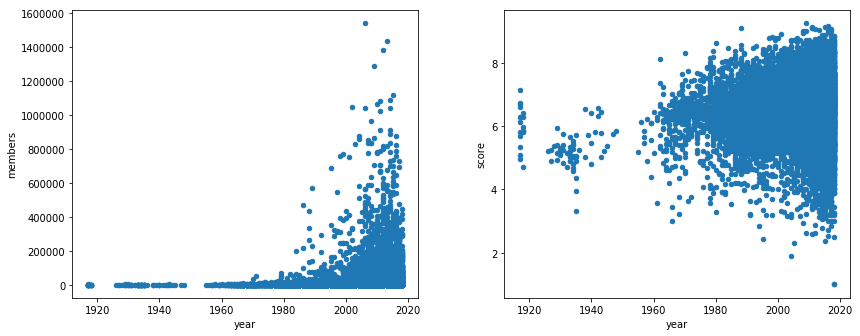

In [19]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 0.8, 1])
ax2 = fig.add_subplot(121, position=[1, 0, 0.8, 1])
anime.plot(x='year', y='members', kind='scatter', ax= ax1)
anime.plot(x='year', y='score', kind='scatter', ax= ax2)

Iz prvega grafa z lahkoto razberemo, da so novejši animeji gotovo bolj popularni od starejših. Drugi graf pa je, ker je novejših animejev bistveno več, pregost in se resnici povprečna ocena zelo slabo vidi, zato bo treba grafa malce spremeniti.

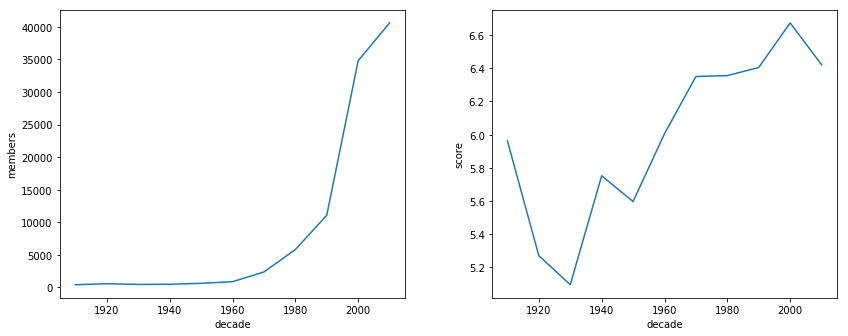

In [20]:
anime['decade'] = anime['year'] // 10 * 10
anime_by_decade = anime.groupby('decade')
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 0.8, 1])
ax1.set_ylabel('members')
ax2 = fig.add_subplot(121, position=[1, 0, 0.8, 1])
ax2.set_ylabel('score')
anime_by_decade['members'].mean().plot(ax=ax1)
anime_by_decade['score'].mean().plot(ax=ax2)

In res, drugi graf potrdi našo hipotezo.

## Žanri

Pa opremimo našo tabelo animejev še z žanri:

In [21]:
genres = pd.read_csv('data/genres.csv', index_col='id')
linked_genres = pd.read_csv('data/linkedgenres.csv')

In [22]:
anime_with_genres = pd.merge(
    pd.merge(anime, linked_genres, left_index=True, right_on='anime'),
    genres, left_on='genre', right_index=True)
anime_with_genres = anime_with_genres.drop(['anime','genre'], axis=1)
anime_with_genres = anime_with_genres.rename(columns={'name': 'genre'})
anime_with_genres

,title,score,episodes,type,status,source,rating,members,duration,description,year,decade,genre
0,Cowboy Bebop,8.81,26.0,TV,Finished Airing,Original,R - 17+ (violence &amp; profanity),758864,24 min. per ep.,"In the year 2071, humanity has colonized sever...",1998.0,1990.0,Action
6,Cowboy Bebop: Tengoku no Tobira,8.41,1.0,Movie,Finished Airing,Original,R - 17+ (violence &amp; profanity),190962,1 hr. 55 min.,"Another day, another bounty—such is the life o...",2001.0,2000.0,Action
11,Trigun,8.30,26.0,TV,Finished Airing,Manga,PG-13 - Teens 13 or older,395512,24 min. per ep.,"Vash the Stampede is the man with a $$60,000,0...",1998.0,1990.0,Action
17,Witch Hunter Robin,7.33,26.0,TV,Finished Airing,Original,PG-13 - Teens 13 or older,77661,25 min. per ep.,Witches are individuals with special powers li...,2002.0,2000.0,Action
27,Eyeshield 21,8.04,145.0,TV,Finished Airing,Manga,PG-13 - Teens 13 or older,111586,23 min. per ep.,Sena is like any other shy kid starting high s...,2005.0,2000.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39470,Tales of HR,5.67,NaN,ONA,Currently Airing,Game,G - All Ages,161,4 min.,Looking for information on the anime Tales of ...,2018.0,2010.0,Parody
39474,Tales of Puppet,6.89,NaN,ONA,Currently Airing,Game,PG-13 - Teens 13 or older,289,6 min.,"A puppet parody of the Tales of franchise, fil...",2018.0,2010.0,Parody
39619,Aigan Kaijuu,1.00,NaN,TV,Currently Airing,Other,None,83,3 min.,Looking for information on the anime Aigan Kai...,2018.0,2010.0,Parody
39635,God Eater Reso Nantoka Gekijou: Episode EX,5.00,2.0,ONA,Finished Airing,Game,PG-13 - Teens 13 or older,266,3 min. per ep.,Short anime inspired by the iOS and Android mo...,2018.0,2010.0,Parody


In [23]:
anime_by_genres = anime_with_genres.groupby('genre')
anime_by_genres.size().sort_values(ascending=False)

genre
Comedy        5142
Action        3141
Fantasy       2601
Adventure     2529
Sci-Fi        2216
              ... 
Thriller        99
Cars            98
Josei           84
Shounen Ai      78
Shoujo Ai       65
Length: 40, dtype: int64

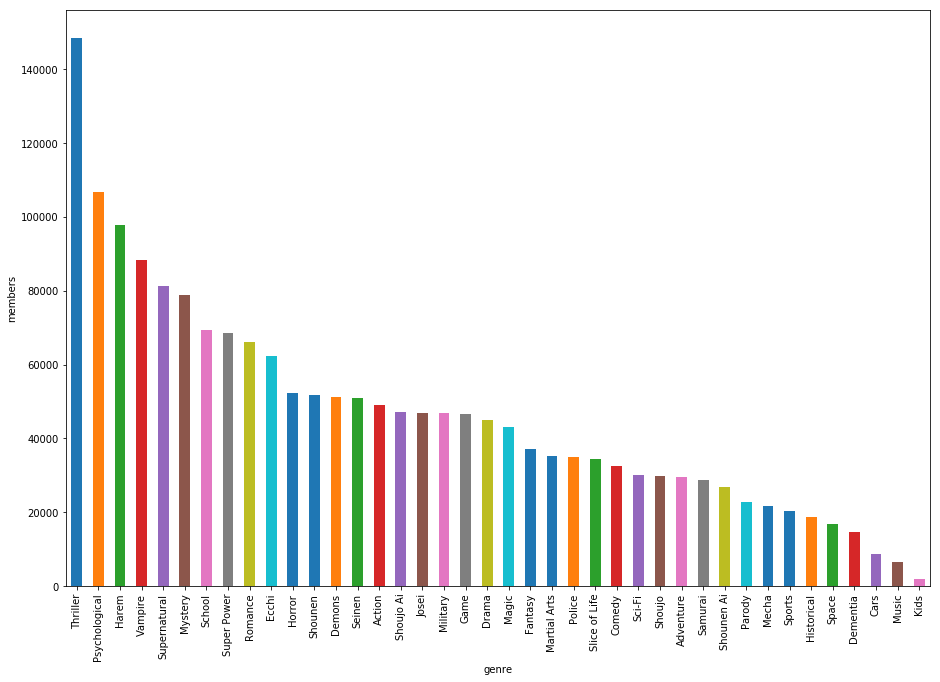

In [24]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 2, 2])
ax1.set_ylabel('members')
anime_by_genres['members'].mean().sort_values(ascending=False).plot.bar(ax=ax1)

Pojavi se očitna dilema: kako definiramo popularnost žanra? Naravno se zdi morda, da bi vzeli povprečno popularnost po vseh animejih, ki ta žanr zastopajo, a pojavi se težava. Comedy je najbolj pogost žanr, a kot je vidno v zgornji tabeli je povprečna popularnost comedy animejev precej nizka. Najti moramo nek način, da zajamemo pogostost žanra in popularnost animejev tega žanra naenkrat. Mislim, da je morda za to najbolje __sešteti vse memberje__ animejev z določenim žanrom.

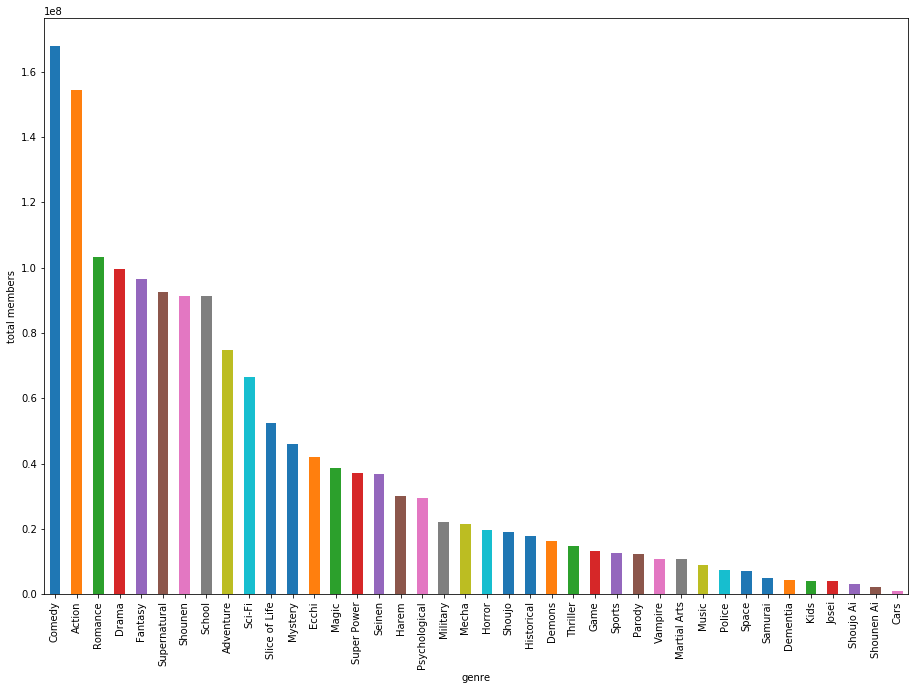

In [25]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 2, 2])
ax1.set_ylabel('total members')
anime_by_genres['members'].sum().sort_values(ascending=False).plot.bar(ax=ax1)

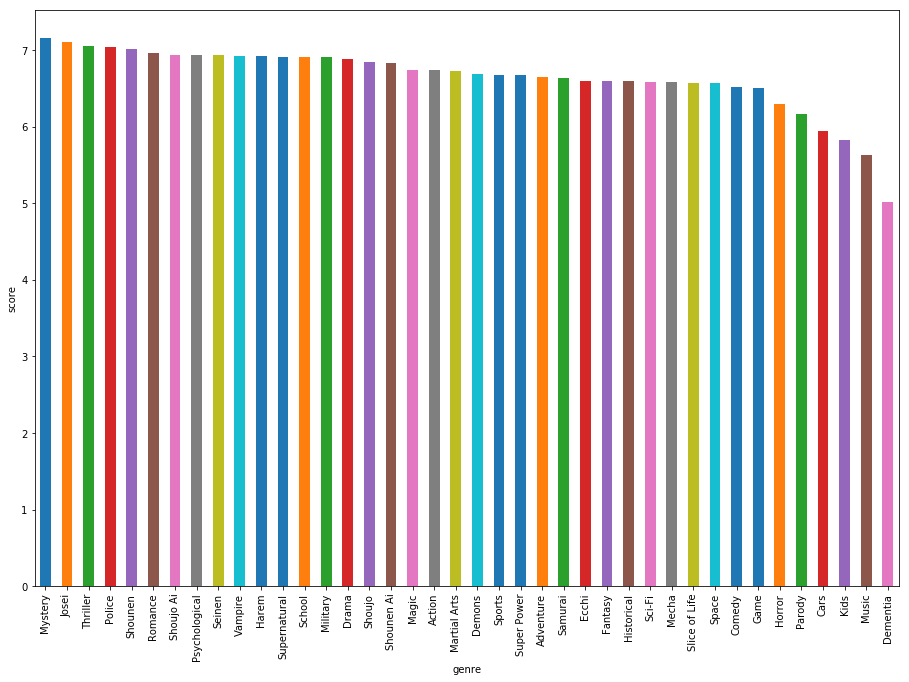

In [26]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 2, 2])
ax1.set_ylabel('score')
anime_by_genres['score'].mean().sort_values(ascending=False).plot.bar(ax=ax1)

Pri oceni žanrov se zdi kot da je povprečna ocena zastopajočih animejev popolnoma ustrezna, zato se bomo s tem tudi zadovoljili. Naša hipoteza se je glasila: __"Comedy je najslabše ocenjen žanr, a pri tem najbolj popularen."__ Comedy sicer ni najslabše ocenjen žanr, pač pa 8 najslabši, a ker je vseh žanrov 40 je to že precej slabo. Prav tako se je izkazalo, da je po naši definiciji popularnosti Comedy res najbolj popularen. Kljub temu, da ne moremo reči, da je hipoteza bila popolnoma pravilna, se mi zdi, da vseeno zadane bistvo. Ravno to, da je comedy najbolj pogost mu slabša povprečno oceno, saj se ta žanr res znajde v vsakršnih animejih.

Za našo naslednjo hipotezo bomo morali prešteti koliko žanrov ima anime. Pa se tega kar lotimo.

In [27]:
special_linked_genres = linked_genres.groupby('anime')['genre'].size().to_frame().rename(columns={'genre': 'number_of_genres'})
anime_with_number_of_genres = pd.merge(anime, special_linked_genres, left_index=True, right_index=True)

In [28]:
anime_by_number_of_genres = anime_with_number_of_genres.groupby('number_of_genres')
pd.options.display.max_rows = 15
anime_by_number_of_genres.size()

number_of_genres
1     2562
2     3076
3     2840
4     2121
5     1411
6      655
7      262
8       74
9       39
10      15
11       1
13       1
dtype: int64

Kot vidimo je animejev z številom žanrov večjim kot 7 zanemarljivo malo, zato bomo za voljo bolj reprezentativnih grafov zmanjšali naše gledano območje.

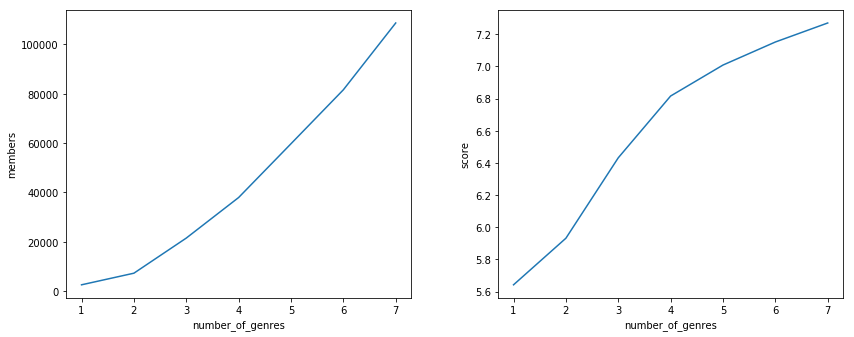

In [29]:
pd.options.display.max_rows = 10
anime_by_fewer_number_of_genres = anime_with_number_of_genres[anime_with_number_of_genres['number_of_genres'] <= 7].groupby('number_of_genres')
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 0.8, 1])
ax1.set_ylabel('members')
ax2 = fig.add_subplot(121, position=[1, 0, 0.8, 1])
ax2.set_ylabel('score')
anime_by_fewer_number_of_genres['members'].mean().plot(ax=ax1)
anime_by_fewer_number_of_genres['score'].mean().plot(ax=ax2)

Razvidno popularnost in ocena rasteta s številom žanrov, kar se ujema z našo hipotezo: __"S številom žanrov se popularnost animeje veča."__ Na pogled se ta trditev morda zdi celo presenetljiva, a čim pogledamo bolj popularne animeje opazimo, da imajo vsaj 5 žanrov. Kljub temu v resnici nisem pričakoval, da se bosta grafa držala tega tako dosledno (po tem ko smo ju prilagodili z izključitvjo primerov, ki nam hodijo narobe :P).

## Studiji

Za proizvodnjo praktično vsakega animeja stoji nek studijo. Čeprav je anime ponavadi narejen po nekem viru (npr. mangi (to je za strip to kar je anime za film), lahkemu romanu (Japonskemu seveda), ...) studijo igra ogromno vlogo pri kvaliteti animacije in tudi spremembi  zgodbe. Pa kar pogrupčkajmo animeje k studijem.

In [30]:
producers = pd.read_csv('data/producers.csv', index_col='id')
linked_studios = pd.read_csv('data/linkedstudios.csv')
linked_producers = pd.read_csv('data/linkedproducers.csv')

In [31]:
studios_with_anime = pd.merge(
    pd.merge(producers, linked_studios, left_index=True, right_on='studio'),
    anime, left_on='anime', right_index=True)
studios_with_anime = studios_with_anime.drop(['studio','anime'], axis=1)
studios_with_anime = studios_with_anime.rename(columns={'name': 'studio'})
studios_with_anime

,studio,title,score,episodes,type,status,source,rating,members,duration,description,year,decade
0,Studio Pierrot,Naruto,7.89,220.0,TV,Finished Airing,Manga,PG-13 - Teens 13 or older,1044233,23 min. per ep.,"Moments prior to Naruto Uzumaki&#039;s birth, ...",2002.0,2000.0
1,Studio Pierrot,Ayashi no Ceres,7.34,24.0,TV,Finished Airing,Manga,R - 17+ (violence &amp; profanity),45031,21 min. per ep.,Ceres was a tennyo (Celestial maiden) who came...,2000.0,2000.0
2,Studio Pierrot,Fushigi Yuugi,7.75,52.0,TV,Finished Airing,Manga,PG-13 - Teens 13 or older,76183,23 min. per ep.,"While visiting the National Library, junior-hi...",1995.0,1990.0
3,Studio Pierrot,Fushigi Yuugi: Eikouden,6.96,4.0,OVA,Finished Airing,Manga,PG-13 - Teens 13 or older,13399,30 min. per ep.,Taka (technically Tamahome) and Miaka are now ...,2001.0,2000.0
4,Studio Pierrot,Gensoumaden Saiyuuki,7.67,50.0,TV,Finished Airing,Manga,R - 17+ (violence &amp; profanity),39322,23 min. per ep.,"Many years ago, humans and demons lived in har...",2000.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,UWAN Pictures,Tenka Touitsu Koi no Ran: Shutsujin! Saika 4-n...,6.00,4.0,ONA,Finished Airing,Game,PG-13 - Teens 13 or older,83,Unknown,15th Century Japan is ravaged by constant wars...,2018.0,2010.0
8786,Brio Animation,Ladyspo,3.90,12.0,TV,Finished Airing,Original,None,2263,4 min. per ep.,Looking for information on the anime Ladyspo? ...,2018.0,2010.0
8787,Sublimation,Walking Meat,7.12,1.0,Movie,Finished Airing,Original,R - 17+ (violence &amp; profanity),173,20 min.,Humanity has grown a taste for zombies. Stewed...,2018.0,2010.0
8788,CygamesPictures,Blade Runner: Black Out 2022,7.05,1.0,ONA,Finished Airing,Other,R - 17+ (violence &amp; profanity),15795,15 min.,"In 2022, an EMP detonation has caused a global...",2017.0,2010.0


In [32]:
studios_total_anime = studios_with_anime.groupby('studio').size().sort_values(ascending=False).to_frame().rename(lambda _: 'total_anime', axis='columns')
studios_total_anime

,total_anime
studio,
Toei Animation,741
Sunrise,464
Madhouse,342
J.C.Staff,327
Production I.G,299
...,...
G-angle,1
Future Planet,1
Fuji TV,1


Kot vidimo je studijev kar nekaj in variirajo tudi po velikosti, namreč obstajajo studiji z več sto narejenimi animeji, prav tako kot tisti z natanko enim.

In [33]:
studios_with_anime_and_total_anime = pd.merge(studios_with_anime, studios_total_anime, left_on='studio', right_index=True)
studios_with_anime_and_total_anime['total_anime'] = studios_with_anime_and_total_anime['total_anime'] // 50 * 50
studios_by_total_anime = studios_with_anime_and_total_anime.groupby('total_anime')

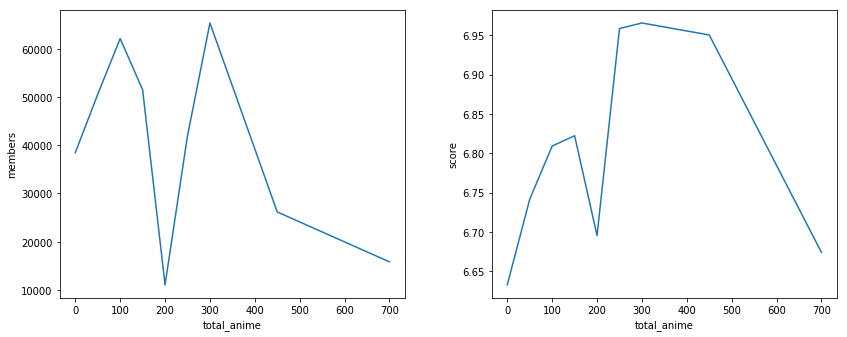

In [34]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 0.8, 1])
ax1.set_ylabel('members')
ax2 = fig.add_subplot(121, position=[1, 0, 0.8, 1])
ax2.set_ylabel('score')
studios_by_total_anime['members'].mean().plot(ax=ax1)
studios_by_total_anime['score'].mean().plot(ax=ax2)

Zgornji graf žal ovrže našo hipotezo: __"Z količino animejev, ki jih studio izdela se njihova poprečna popularnost veča."__ Po svoje vidim zakaj bi lahko kvaliteta animejev padala z številom, ki jih studijo izdela. Takrat namreč ne dobi vsak anime pozornosti, ki jo zahteva in je zato povprečen slabši. Seveda pa izkušnje vseeno nekaj pomenijo zato *members* prav tako kot *score* naraščata s *total_anime* (oz. bolj zato ker so studiji le z nekaj animeji načeloma majhni in imajo posledicno zelo majhen sklad za izdelavo).

## Zaključek

Viri po katerih so animeji narejeni se kot sem že omenil razlikujejo. Nekateri animeji so celo narejeni po igricah, kar se dostikrat izkaže za slabo idejo (še posebaj če izdelovalci ne vejo kaj delajo).

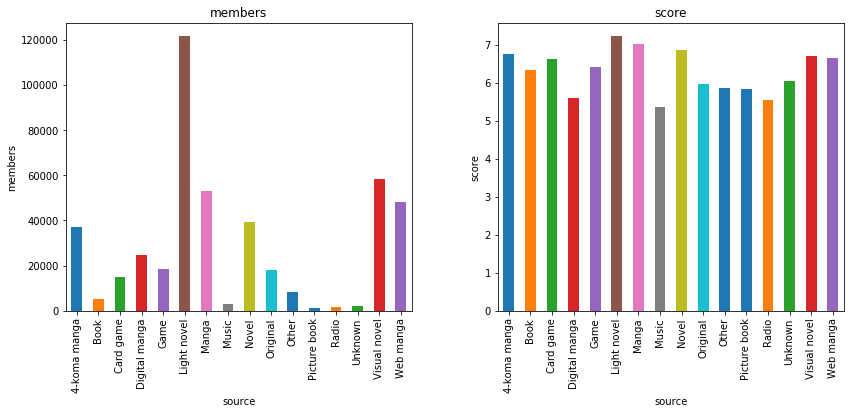

In [35]:
anime_by_source = anime.groupby('source')
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 0.8, 1])
ax1.set_ylabel('members')
ax2 = fig.add_subplot(121, position=[1, 0, 0.8, 1])
ax2.set_ylabel('score')
anime_by_source['members'].mean().plot.bar(title='members', ax=ax1)
anime_by_source['score'].mean().plot.bar(title='score', ax=ax2)

Osebno se mi zdi najbolj presenetljivo, da je eden od virov radio.

Ostala mi je tudi hipoteza: __"Animeji z starostno oceno R-17+ so povprečno bolje ocenjeni od drugih."__

In [36]:
anime_by_rating = anime.groupby('rating')
anime_by_rating.score.mean().sort_values(ascending=False)

rating
R - 17+ (violence &amp; profanity)    6.963468
PG-13 - Teens 13 or older             6.788485
R+ - Mild Nudity                      6.387674
PG - Children                         6.231718
None                                  5.866167
G - All Ages                          5.769572
Name: score, dtype: float64

In res, izkaže se, da imajo gledalci najraje vsebino za odrasle, kar se ne zdi presenetljivo, saj je večina uporabnikov MAL čez 18 (morda bi v naslednji projektni lahko preučil statistiko uporabnikov).

No sedaj smo pa res izčrpali vse postavljene hipoteze. Nekaj smo jih potrdili, nekaj ovrgli, a pomembno je, da smo se kaj novega naučili. Marsikatera od stvari, ki sem jo izvedel tu me je v resnici presenetila, navsezadnje sem si predstavo o statistiki gradil na tistih nekaj animejih, ki sem jih pogledal. Updam, da je kaj od tega presenetilo tudi vas, ali da vsaj niste umrli od dolgčasa.